<span style="font-size: 14pt">ФИВТ, АПТ, Курс по машинному обучению, Весна 2017, семинар 7 </span>

<span style="color:blue; font-size: 12pt">Alexey Romanenko, </span>
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

# Linear models (Линейные модели)
<h3> Plan </h3>

* **Linear Models overview** 
 - Linear Model for Classification
 - Linear Model for Regression (preview)
 - Linear Models and regularization

* **Gradient descent**
 - GD, SGD, SAG, 
 - SGD with different loss function
 - SGD regularization
 
* **SVM: base overview**
 - learning algorithm
 - SVM realization
 - MultiClasss SVM

In [1]:
import os
import numpy as np
import seaborn as sns
import _pickle as pickle  # in Python 2 try import cPickle as pickle

from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification


sns.set_context("notebook", font_scale=1.5)

from IPython.display import Image, SVG

from scipy import optimize
import matplotlib.pyplot as plt
%pylab inline
from IPython import display
import random

plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


<h1 align="center">Warm Up: 3 datasets</h1> 

In [2]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2)
X += np.random.random(X.shape)

datasets = [make_moons(noise=0.1), make_circles(noise=0.1, factor=0.5), (X, y)]

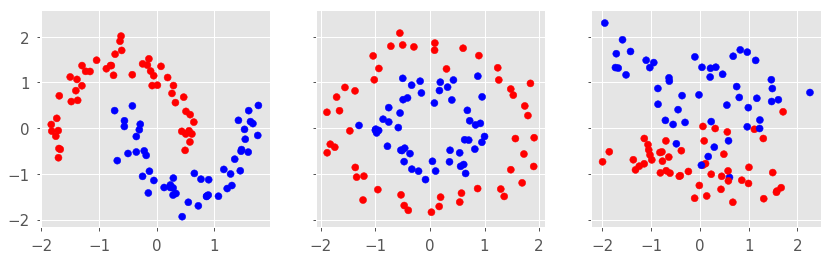

In [3]:
pylab.rcParams['figure.figsize'] = 14, 4
pl = plt.subplots(1, len(datasets), sharex='col', sharey='row')
for i, (X, y) in enumerate(datasets):
    X = StandardScaler().fit_transform(X)
    pl[1][i].scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']))

** Вопрос **: Какая выборка линейно разделима (предполагает использование линейной модели классификации)?

** Вопросы **
 - 1) как выглядит решающее правило для линейных моделей? Какие параметры у линейных моделей?
 - 2) что общего между линейной моделью классификации и регрессии?
 - 3) может ли предсказание линейной модели выходить за область значений обучающей выборки?
 - 4) что такое реуляризация и зачем она нужна?

<h1 align="center"> Linear Model overview </h1>

## For Classification

## $$Y = \{+1, -1\},~X\in \mathbf{R}^d$$
## $$y_{predict}(x) = sign(<w, x>) $$ 
## $$margin(x, y) = y \cdot sign(<w, x>)$$
## $$Q(w, X^\ell) = \frac{1}{n} \sum_i^n L(y_i, <w,x_i>) \rightarrow \min_w$$

## For Regression

## $$Y = \mathbf{R},~X\in \mathbf{R}^d$$
## $$y_{predict}(x) = <w, x> $$ 
## $$Q(w, X^\ell) = \frac{1}{n} \sum_i^n L(y_i, <w,x_i>) \rightarrow \min_w$$

### Loss functions:
    - Hinge Loss 
## $$L_i(x, y; w) = max(0, 1 - y\cdot<w, x>)$$
    - Loistic Loss 
## $$L_i(x, y; w) = log(1 + e^{-y\cdot<w, x>})$$
    - Squared Loss
## $$L_i(x, y; w) = log(1 - y\cdot<w, x>)^2$$

### Loss Functions
![](http://scikit-learn.org/0.15/_images/plot_sgd_loss_functions_001.png = 200x200)
<img src="http://scikit-learn.org/0.15/_images/plot_sgd_loss_functions_001.png">

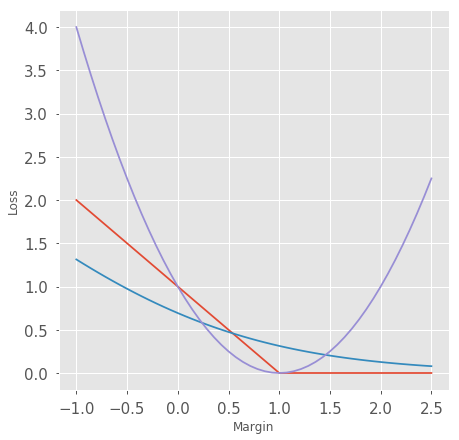

In [4]:
pylab.rcParams['figure.figsize'] = (7.0, 7.0) 
x = np.linspace(-1, 2.5)
pylab.plot(x, list(map(lambda m: np.max([0, 1 - m]), x)), label='hinge')
pylab.plot(x, list(map(lambda m: np.log(1 + e**(-m)), x)), label='logistic')
pylab.plot(x, list(map(lambda m: (1 - m)**2, x)), label='squared')
pylab.ylabel('Loss')
pylab.xlabel('Margin')
pylab.show()

## Регуляризация

<img src="https://raw.githubusercontent.com/shevkunov/ml-mipt-part1/master/2017/seminars/09_linear_models/496/pic/Regularization.PNG">

---------
<h1 align="center">Gradient Descent for Linear Classifiers</h1> 

** Вопросы **
* Что такое градиентный спуск (Gradient Descent?
* Какие недостатки у простоо GD?
* Что такое стохастический градиентный спуск (SGD)? SAG?
* Достоинства и недостатки метода SGD?

<img src="https://raw.githubusercontent.com/shevkunov/ml-mipt-part1/master/2016/seminars/05_linear/img/conv.jpg">

### Gradient descent
<img src="http://upload.wikimedia.org/wikipedia/commons/f/ff/Gradient_descent.svg" width="60%">

### Градинтный спуск
## $$w_{k+1} = w_k - \nabla Q(w_k, X^\ell)= w_k - \nabla \sum_i L(w_k, x_i)$$

### Main Problems of gradient method
* multicollinearity
* scaling problem
* Plateau
* Zig-zagginh

## Plateau
<img src="http://upload.wikimedia.org/wikipedia/commons/6/60/Banana-SteepDesc.gif" width="80%">

## Zig-zagging
<img src="http://upload.wikimedia.org/wikipedia/commons/7/79/Rosenbrock.png" width="70%">

## Как вычислять градиент
## $$         \nabla_x \langle a, x \rangle = a.     $$
## $$         \nabla_x \|x\|_2^2 = 2 x.     $$
## $$         \nabla_x \langle Ax, x \rangle = (A + A^T) x, $$
### $where ~ A \in R^{d \times d}$
## $$         \nabla_x \|Ax + b\|_2^2 = 2 A^T (Ax + b).     $$

**Задача ** Найти производные приведенных функций по w, в матричной форме 
## $$f(w) = \sum_i log(1-e^{-y_i <x_i, w>})$$

### Нютон (HF, BFGS)

## $$w_{k+1} = w_k - \nabla^2 f(x_k) \nabla f(x_k)$$

Методы второго порядка -- намного быстрее, но как правило дорогие т.к. требуют хранения гессиана.

Некоторые методы второго порядка лишены этого недостатка, при необходимости используйте BFGS или HF Newton. 

In [ ]:
def nw(X, y, w, gradf, hessf, dold):
    return -np.linalg.inv(hessf(X, y, w)).dot(grad_function(X, y, w))

for X, y in datasets:
    X, y = expand(X), -2*(y-0.5)
    a = viz_opt(loss_function, grad_function, hess_function, X, y, nw) 

display.clear_output()

### Stochastic GD, Momentum, Nesterov

Что делать если в функции большая сумма? Давайте считать градиент только по случайной подвыборке

## $$w_{k+1} = w_k -  \nabla \hat{f}(w_k)$$

## $$w_{k+1} = w_k - E \nabla \hat{f}(x_k)$$

## $$x_{k+1} =w_k - E \nabla \hat{f}(x_k-\alpha E \nabla \hat{f}_{k-1})$$

## Достоинства и недостатки SGD
* Benefits:
     - Suitable for online learning
     - Learning on big and small sets
     - Faster than classic GD

* Disadvantages and recommendations
    - Convergence problems!
    - Multiextremal functional and local extremums
        -- recommendation: jog of weights
    - Not very fast
           - recommendation: SAG version of SGD
$$w^{(t+1)}=w^{(t)}-\frac{\eta_t}{\ell} \nabla \left( (\ell-1)\cdot Q(w^{(t-1)},X^\ell\setminus \{x_i\}) + Q(w^{(t)},x_i)\right)$$
    - Sensitivity to feature scales
           - recommendation: scale features
    - Over-fitting and instability
           - recommendation: regularization 
$$Q_\tau(w) = Q(w)+\frac{\tau}{2}\lVert w\rVert^2$$

-------
<h1 align="center">SVM</h1> 

** Вопросы **
* Основная идея SVM?
* Что такое 
    - разделяющая гиперплоскость
    - опорный вектор
    - Margin?
* Как обучается SVM?

<center> Svm_max_sep_hyperplane_with_margin.png </center>
<img src="http://upload.wikimedia.org/wikipedia/commons/2/2a/Svm_max_sep_hyperplane_with_margin.png" width="50%">

Реализуем SVM своими руками
See <a href="https://github.com/ml-mipt/ml-mipt-part1/blob/master/2017/seminars/07_linear_models/my_svm.ipynb">my_svm.ipynb</a>

<h1 align="center">Заключение</h1>  

**SGD**: 
*Достоинства:
    - Быстрые
    - Работают
    - Интерпретируемы
    - Применимы к большим данным
    - Можно обучать онлайн
* Недостатки:
    - Не всегда хороши (вопросы сходимости)

** SVM **
* Достоинства
    - Сильная обощающая способность
    - Выпуклая задача оптимизация (наличие решения)
    - Не нужны все объекты обучающей выборки для обучения
* Недостатки:
    - пока не добрались :)

** HW **
    - реализовать SVM и запустить его сгенерированной обучающей выборке (см.ссылку на стартовый код выше)

** Обратная связь ** 
  * оцените <a href="https://docs.google.com/forms/d/e/1FAIpQLSdmyY3f-lwrhSGeqJPaxcXrdj0SfZzZbgRIggg-nx4EQ_eQLQ/viewform?c=0&w=1"> семинар </a>
  * оставьте <a href="https://docs.google.com/forms/d/e/1FAIpQLSdefy8neFtoxDlXD3toHi3fWB3OW-23APTRj-GuTX8wtAJahQ/viewform?c=0&w=1"> отзыв </a> о лекции